In [277]:
#Hermawan - NEVTIK Programming Division
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [278]:
url = requests.get("https://www.worldometers.info/coronavirus/").text
data_parent = bs(url,'html.parser')
today = date.today()
corona_date = pd.DataFrame({'date':today,'cases':int(''.join([i for i in data_parent.find_all('div',id='maincounter-wrap')[0].text if i.isnumeric()]))},index = [0])
try:
    corona_bydate = pd.read_csv('Corona_Case.csv')
    corona_bydate.append(corona_date)
    corona_bydate.drop_duplicates('date',keep=False,inplace=True)
    corona_bydate.to_csv('Corona_Case.csv',index = None,header = True)
except:
    corona_date.to_csv('Corona_Case.csv',index=None,header=True)

In [279]:
table = data_parent.find('tbody').find_all('tr')
table_body = [table_data.find_all('td') for table_data in table]

country_list = [i[0].text.strip() for i in table_body]
total_cases = [int(i[1].text.strip().replace(',','')) for i in table_body]
new_cases = [0 if i[2].text.strip()=='' else int(i[2].text.strip().strip('+').replace(',','')) for i in table_body]
total_deaths = [0 if i[3].text.strip()=='' else int(i[3].text.strip().replace(',','')) for i in table_body]
new_deaths = [0 if i[4].text.strip()=='' else int(i[4].text.strip().strip('+').replace(',','')) for i in table_body]
total_recovered = [0 if i[5].text.strip()=='' else int(i[5].text.strip().replace(',','')) for i in table_body]
active_cases = [int(i[6].text.strip().replace(',','')) for i in table_body]

In [280]:
detail = list(zip(country_list,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases))
detail_dict = {k:v for (k,*v) in detail}
columns = ['Negara','Total_Kasus','Kasus_Baru','Total_Kematian','Kematian_Baru','Total_Disembuhkan','Kasus_Aktif']

In [281]:
dataframe = pd.DataFrame(detail,columns=columns)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
dataframe.to_csv('Corona_Case_{}.csv'.format(date.today()),index=None,header=True)

In [282]:
dataframe

,Negara,Total_Kasus,Kasus_Baru,Total_Kematian,Kematian_Baru,Total_Disembuhkan,Kasus_Aktif
0,China,80881,21,3226,13,68690,8965
1,Italy,27980,0,2158,0,2749,23073
2,Iran,14991,0,853,0,4996,9142
3,Spain,9942,0,342,0,530,9070
4,S. Korea,8320,84,81,6,1401,6838
5,Germany,7272,0,17,0,67,7188
6,France,6633,0,148,0,12,6473
7,USA,4718,55,93,7,74,4551
8,Switzerland,2353,0,19,0,4,2330
9,UK,1543,0,55,0,52,1436


In [288]:
def graphic(title,list_name,ytitle,sort=False):
    data_frame = dataframe
    if sort==True:
        data_frame = dataframe.sort_values(by=[list_name],ascending=False)
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,6))
    plt.figure(figsize=(15,6))
    fig.suptitle(title)
    ax1.bar(data_frame['Negara'][:6], data_frame[list_name][:6],alpha=0.7,color='red')
    ax2.bar(data_frame['Negara'][6:30], data_frame[list_name][6:30],alpha=0.7,color='green')
    ax3.bar(data_frame['Negara'][30:51],data_frame[list_name][30:51],alpha= 0.7,color='blue')
    ax1.set_ylabel(ytitle)
    ax2.tick_params(axis = 'x',labelrotation=90);ax3.tick_params(axis = 'x', labelrotation=90);ax1.tick_params(axis = 'x',labelrotation = 70)
    plt.show()

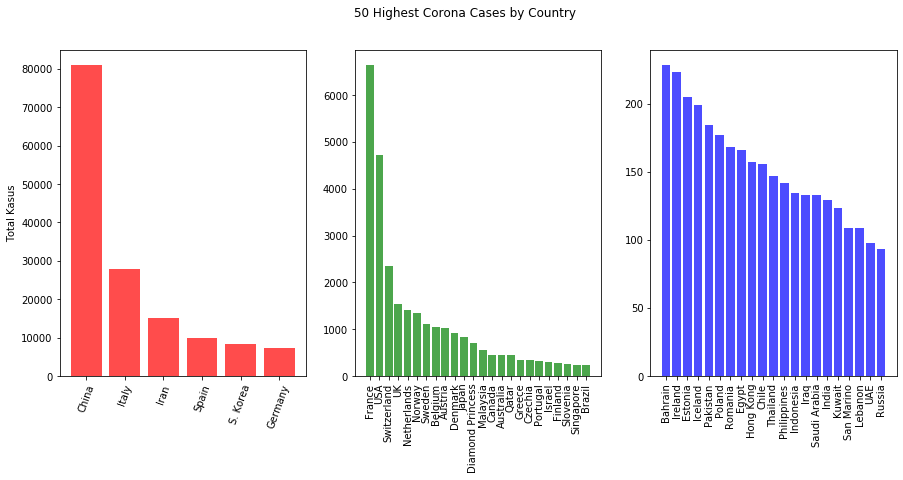

<Figure size 1080x432 with 0 Axes>

In [289]:
graphic('50 Highest Corona Cases by Country','Total_Kasus','Total Kasus')

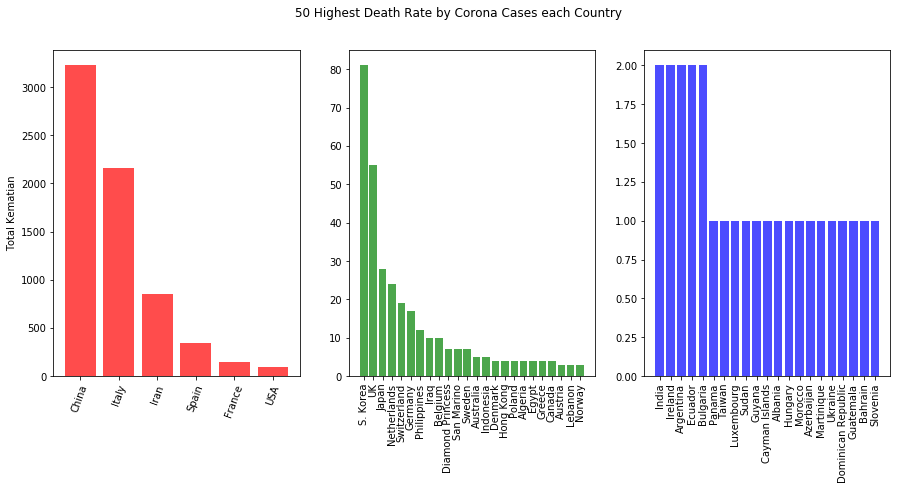

<Figure size 1080x432 with 0 Axes>

In [290]:
graphic('50 Highest Death Rate by Corona Cases each Country','Total_Kematian','Total Kematian',sort=True)

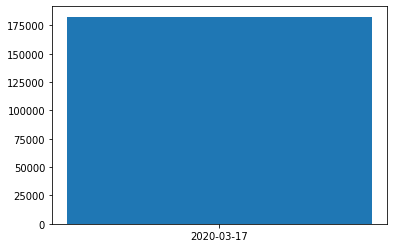

In [286]:
b = pd.read_csv('Corona_Case.csv')
plt.bar(b['date'],b['cases'])
plt.show()